In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# *CÁLCULO DE TARIFA ÁGUA - CAGEPA - 2021-2023*


### WATER RATE CALCULATION - CAGEPA - 2021-2023


In [38]:
def dfrm(y): #Function - receive year from CM3 / Função - Recebe ano do CM3
    """
    Each year has a different tables with adjusted values / Cada ano tem tabelas diferentes com valores ajustados
    """
    if y == 2021:
        TB21 = np.array([[40.64, 32.51, 0, 0.8], [5.24, 4.19, 0, 0.8], [6.91, 6.22, 0, 0.9], [9.39, 9.39, 0, 1]])
        df = pd.DataFrame(TB21)
        print(f'---Tabela de Preços de {y}---')
        print(df)
        print('-' * 30)
    if y == 2022:
        TB22 = np.array([[44.03, 35.22, 0, 0.8], [5.68, 4.54, 0, 0.8], [7.49, 6.74, 0, 0.9], [10.17, 10.17, 0, 1]])
        df = pd.DataFrame(TB22)
        print(f'---Tabela de Preços de {y}---')
        print(df)
        print('-' * 30)
    if y == 2023:
        TB23 = np.array([[46.28, 37.02, 0, 0.8], [5.97, 4.78, 0, 0.8], [7.87, 7.08, 0, 0.9], [10.69, 10.69, 0, 1]])
        df = pd.DataFrame(TB23)
        print(f'---Tabela de Preços de {y}---')
        print(df)
        print('-' * 30)
        
    return df


In [39]:
def CM3(anno, x): #Function - Receive year and cubic meters/ Função - Recebe ano e metro cúbico

    df = dfrm(anno)    #Function - Insert the year to another function / Função - Insere o ano para outra função    
    cst = sum(df.iloc[0,:2]) #Select the first line and the first and second columns to sum them / Seleciona a primeira linhas e os valores da primeira e segunda coluna e somam os dois
    print(f'Valor da Soma do df: {round(cst,2)}')
    
    #Calculate the values according to cubic meters / Calculando os valores de acordo com os metros cúbicos
    if x < 11:
        sp = cst

    if x > 10 and x <=20:
        sp = cst + (x-10)*sum(df.iloc[1, :2])

    if x > 20 and x <=30:
        sp = cst + (10)*sum(df.iloc[1,:2]) + (x-20)*sum(df.iloc[2, :2])
  
    if x > 30:
        sp = cst + (10)*sum(df.iloc[1, :2]) + (10)*sum(df.iloc[2, :2])+ (x-30)*sum(df.iloc[3, :2])

    return sp

In [60]:
answer = 's'
while answer == 's':
    ano = int(input("Qual o ano de referência? ")) #year of reference
    m3 = float(input("Quantos m³ foram consumidos? ")) #cubic meters
    total = CM3(ano, m3)
    print(f"Valor a ser pago em {ano}: ..................R$\033[1m {total:,.2f}\033[0m.")
    answer = str(input('Deseja realizar outra conta? s/n '))
print("Volte sempre!")
    

---Tabela de Preços de 2023---
       0      1    2    3
0  46.28  37.02  0.0  0.8
1   5.97   4.78  0.0  0.8
2   7.87   7.08  0.0  0.9
3  10.69  10.69  0.0  1.0
------------------------------
Valor da Soma do df: 83.3
Valor a ser pago em 2023: ..................R$ 377.07.
Volte sempre!


# *COMPARAÇÃO DO MODELO GERAL DE CONSUMO 2021-2023*

### COMPARISON OF THE GENERAL CONSUMPTION MODEL

In [ ]:
consumo_modelo = [10, 20, 30, 40] #Aleatory M³ numbers for comparison/ Números em M³ aleatórios para comparação
ano_base = [2021, 2022, 2023]
listaw = []
for ab in ano_base:
    for cm in consumo_modelo:
        total = float(CM3(ab, cm)) #Creating a df for each year and CM / Criando um df para cada ano e CM
        listaw.append(total)

In [50]:
colunas = ['C_10M3', 'C_20M3', 'C_30M3', 'C_40M3']
lista = np.asarray(listaw).reshape(3, 4) #Reordering the table / Reordenando a tabela
tab_modelo = pd.DataFrame(lista, index = ano_base, columns = colunas)
tab_modelo = tab_modelo.T #Transpose Dataframe / Transposição do Dataframe
print("---- TABELA DE VALORES M³/ ANO ----")
tab_modelo



---- TABELA DE VALORES M³/ ANO ----


,2021,2022,2023
C_10M3,73.15,79.25,83.3
C_20M3,167.45,181.45,190.8
C_30M3,298.75,323.75,340.3
C_40M3,486.55,527.15,554.1


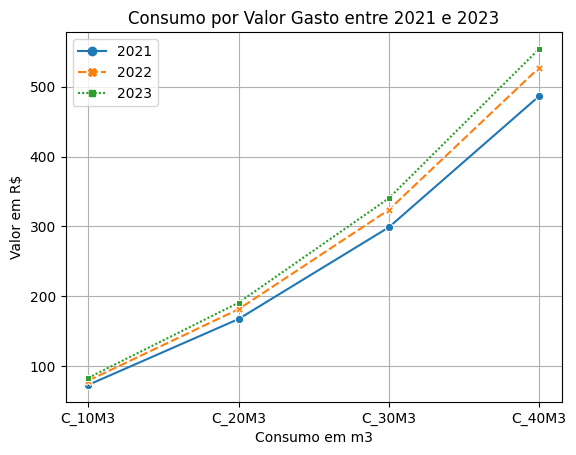

In [41]:
sns.lineplot(data = tab_modelo, markers = True) 
plt.xlabel('Consumo em m3')
plt.ylabel('Valor em R$')
plt.title('Consumo por Valor Gasto entre 2021 e 2023')


plt.grid()
plt.show()

In [56]:
df = tab_modelo.copy()
percentual_aumento = ((df.iloc[:, 1:].values - df.iloc[:, :-1].values) / df.iloc[:, :-1].values * 100)

# Get the name of the columns / Obter os nomes das colunas
nomes_colunas = df.columns
# Create a new DataFrame with the percentage increases and column names / Criar um novo DataFrame com os percentuais de aumento e nomes das colunas
df_percentual = pd.DataFrame(percentual_aumento, columns=[f'Aumento % de {nomes_colunas[i]} para {nomes_colunas[i+1]}' for i in range(len(df.columns)-1)], index = colunas)


In [57]:
df_percentual

,Aumento % de 2021 para 2022,Aumento % de 2022 para 2023
C_10M3,8.339029,5.110410
C_20M3,8.360705,5.152935
C_30M3,8.368201,5.111969
C_40M3,8.344466,5.112397
